In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


# To Do

figure out how to pass the df from data processing over without typing the list as a string

refactor graphing into a function 

figure out how to get the files from input to source without symlinks

In [148]:
lyrics_df = pd.read_pickle('../../Data_Processing/Outputs/Lyrics_DF')


In [149]:
lyrics_df.head()

,Artist,Title,Lyrics,Syllables
0,Billie Eilish,when the party’s over,"[don't, you, know, i'm, no, good, for, you, i'...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, ..."
1,Billie Eilish,bad guy,"[white, shirt, now, red, my, bloody, nose, sle...","[1, 1, 1, 1, 1, 2, 1, None, 1, 1, 1, 2, 1, Non..."
2,Billie Eilish,bury a friend,"[mehki, raine, billie, billie, eilish, what, d...","[None, 1, 2, 2, None, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,Billie Eilish,i love you,"[it's, not, true, tell, me, ive, been, lied, t...","[1, 1, 1, 1, 1, None, 1, 1, 1, 1, 2, 1, 1, 1, ..."
4,Billie Eilish,wish you were gay,"[baby, i, don't, feel, so, good, six, words, y...","[2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 2, 1, 1, ..."


In [150]:
bad_guy = lyrics_df.loc[lyrics_df['Title'] == 'bad guy']['Syllables'].to_list()[0]
print(bad_guy)


[1, 1, 1, 1, 1, 2, 1, None, 1, 1, 1, 2, 1, None, 2, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [151]:
def extract_syls(title,syl_list):
    song = {}
    syls = [x for x in syl_list if x is not None]
    song[title] = syls
    return song

def split_syls(syl_list, chunks):
    syls = [x for x in syl_list if x is not None]
    syl_chunks_array = np.array_split(syls, chunks)
    list_of_chunks = [np.mean(chunk) for chunk in syl_chunks_array]
    return list_of_chunks

In [152]:
def build_song_list(df,n):
    results = []
    for index, row in df.iterrows():
        song = {}
        song[row['Title']] = split_syls(row['Syllables'],n)
        #song[row['Title']] = row['Syllables']
        results.append(song)
    return results
song_list = build_song_list(lyrics_df,20)
print(song_list)

[{'when the party’s over': [np.float64(1.1), np.float64(1.1), np.float64(1.2), np.float64(1.1), np.float64(1.0), np.float64(1.0), np.float64(1.2), np.float64(1.1), np.float64(1.1), np.float64(1.3), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.1111111111111112), np.float64(1.3333333333333333), np.float64(1.0), np.float64(1.1111111111111112), np.float64(1.0), np.float64(1.0), np.float64(1.0)]}, {'bad guy': [np.float64(1.2307692307692308), np.float64(1.2307692307692308), np.float64(1.0), np.float64(1.2307692307692308), np.float64(1.2307692307692308), np.float64(1.0769230769230769), np.float64(1.1538461538461537), np.float64(1.1538461538461537), np.float64(1.0), np.float64(1.3076923076923077), np.float64(1.0769230769230769), np.float64(1.1538461538461537), np.float64(1.1538461538461537), np.float64(1.1538461538461537), np.float64(1.0769230769230769), np.float64(1.0769230769230769), np.float64(1.1538461538461537), np.float64(1.0), np.float64(1.25), np.float64(1.0)]}, {'bu

In [153]:
def build_X(song_list):
    split_len = (len(list(song_list[0].values())[0]))
    x = pd.DataFrame(columns=[f"f{i+1}" for i in range(split_len)])
    for item in song_list:
        for key, value in item.items():
            x.loc[key] = item[key]
    return x

x = build_X(song_list)
print(x.head())

                             f1        f2        f3        f4        f5  \
when the party’s over  1.100000  1.100000  1.200000  1.100000  1.000000   
bad guy                1.230769  1.230769  1.000000  1.230769  1.230769   
bury a friend          1.142857  1.047619  1.200000  1.400000  1.300000   
i love you             1.100000  1.100000  1.111111  1.111111  1.111111   
wish you were gay      1.384615  1.230769  1.076923  1.307692  1.076923   

                             f6        f7        f8        f9       f10  \
when the party’s over  1.000000  1.200000  1.100000  1.100000  1.300000   
bad guy                1.076923  1.153846  1.153846  1.000000  1.307692   
bury a friend          1.300000  1.400000  1.050000  1.050000  1.200000   
i love you             1.111111  1.000000  1.444444  1.222222  1.111111   
wish you were gay      1.153846  1.076923  1.000000  1.153846  1.384615   

                            f11       f12       f13       f14       f15  \
when the party’s over  

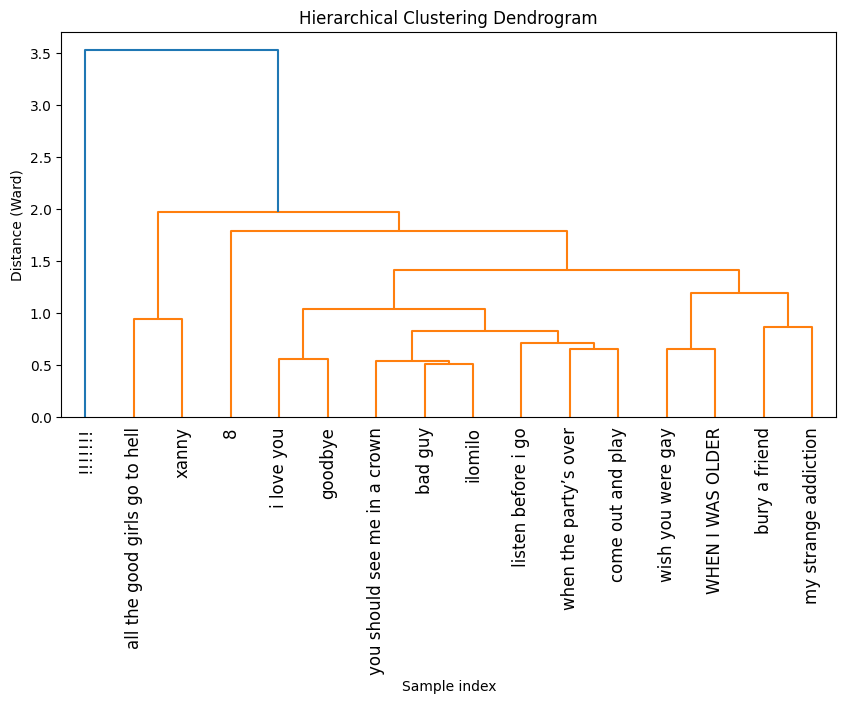

In [154]:
#clustering = AgglomerativeClustering().fit(x)
Z = linkage(x, method='ward', )
plt.figure(figsize=(10, 5))
dendrogram(Z, labels=x.index.to_list())
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance (Ward)')
plt.xticks(rotation = 90)
plt.show()

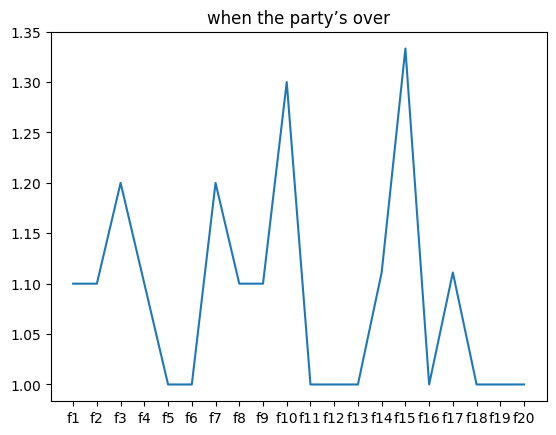

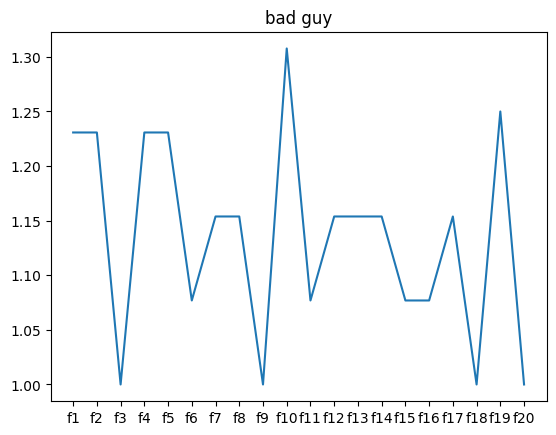

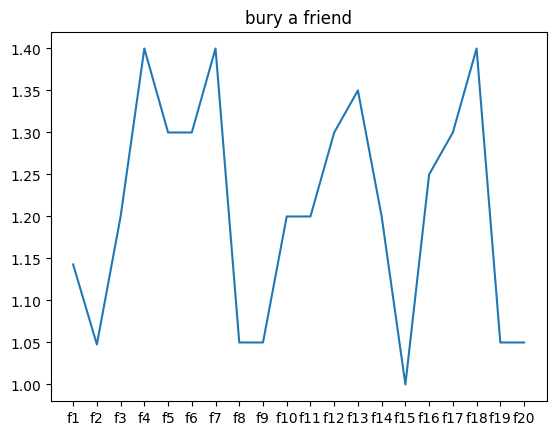

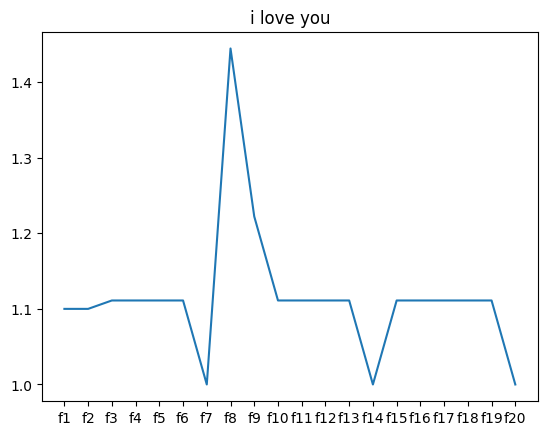

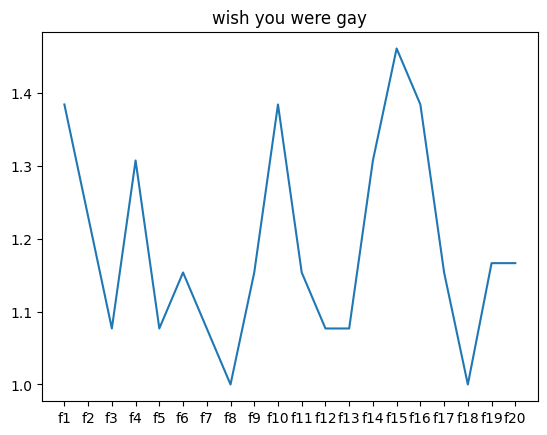

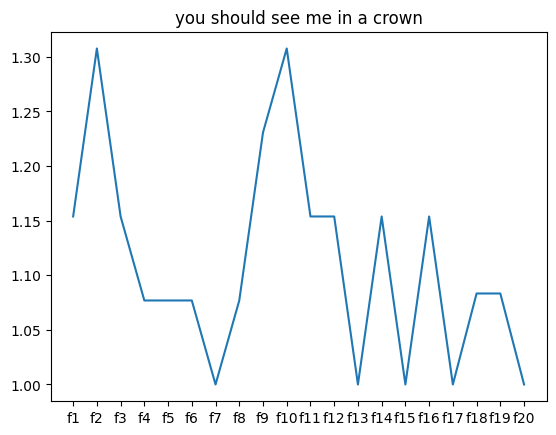

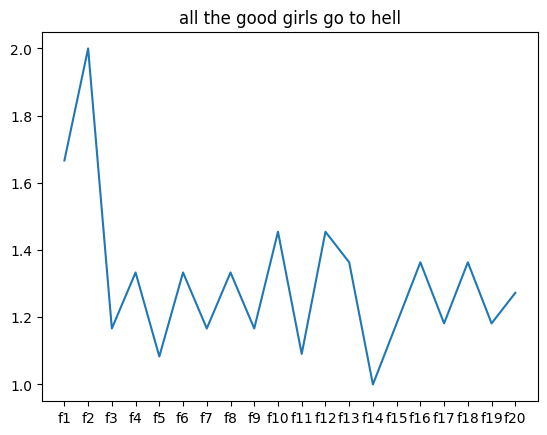

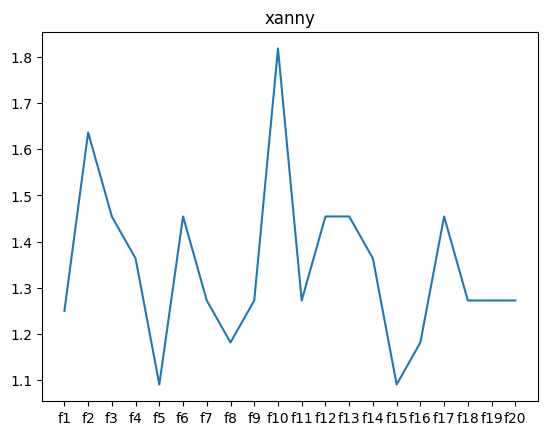

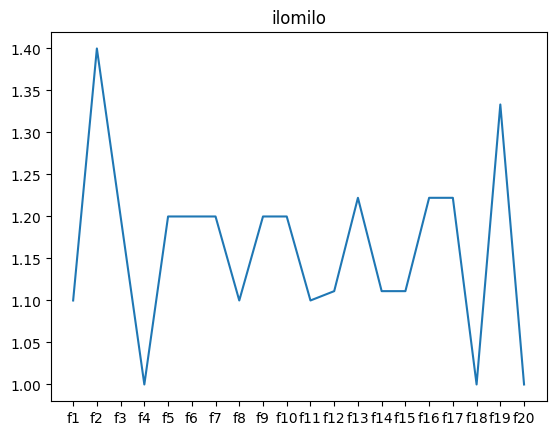

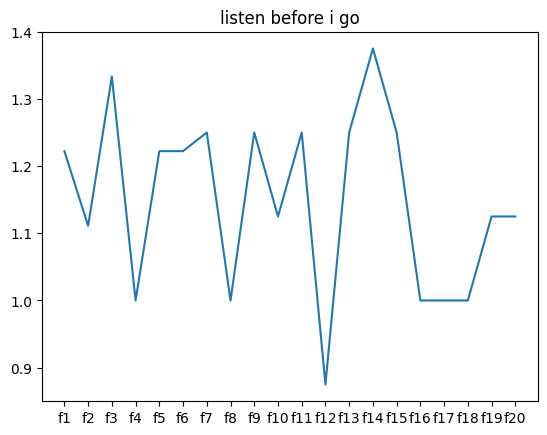

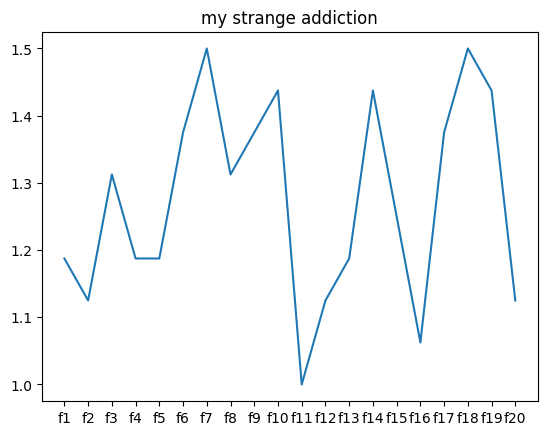

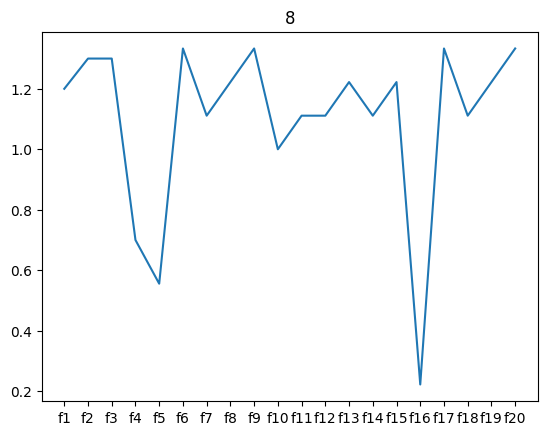

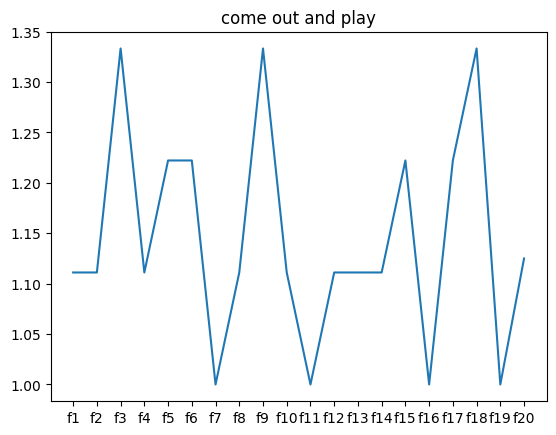

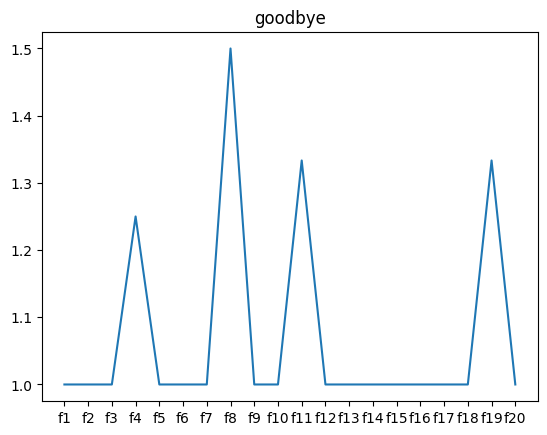

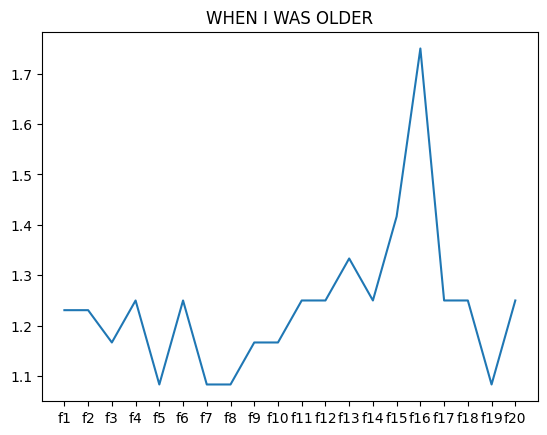

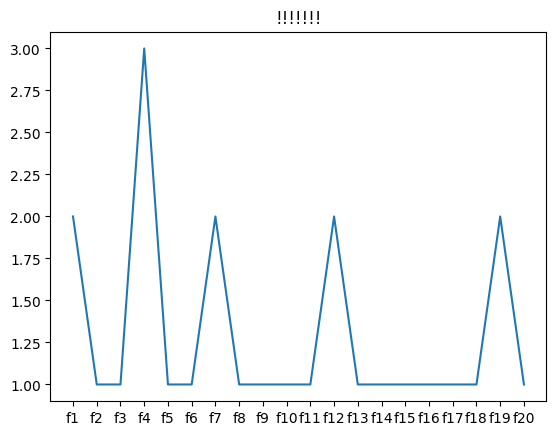

In [155]:
row = 0
for index, rows in x.iterrows():   
    plt.figure()
    plt.title(x.index[row])
    plt.plot(x.iloc[row])
    row += 1